In [60]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
import math
from sklearn.feature_extraction.text import TfidfVectorizer

# Natural Language Processing (NLP) 

One way of improving our algorithm's score is to go through a pre-processing step before vectorizing the data. NLP pre-processing before vectorizing the data.  Here are the steps:
- Change Case
- Tokenization
- Stop-Words Removal
- Stemming or Lemmatization
- N-grams
- Vectorization 

In [61]:
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Data_Preprocessing\Data_Oqali\merged.csv', low_memory=False, sep=',')
df = df[["Code_produit", "Secteur", "Famille", "Denomination_de_vente", "Nom", "Conservation", "Ingrédient"]]
df

,Code_produit,Secteur,Famille,Denomination_de_vente,Nom,Conservation,Ingrédient
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,Lait fermente sucre a boire aux fruits enrichi...,GERVAIS A BOIRE,Frais,lait ecreme reconstitue sucre fruit creme epai...
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,Yaourt a boire sucre aromatise,P TIT YOP PARFUM FRAISE,Frais,yaourt au lait partiellement ecreme sucre siro...
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,Yaourt a boire sucre aux fruits,YOCO A BOIRE,Frais,yaourt au lait mg sucre fruits fruit fruit fr...
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,Yaourt a boire sucre aux fruits,YOCO A BOIRE,Frais,yaourt au lait mg sucre fraise fructose conce...
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,,FROMAGE BLANC MG,Frais,lait ecreme pasteurise creme pasteurisee ferme...
...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,Sirop d orange,SIROP D ORANGE,Ambiant,sucre eau jus d orange a base de concentre aci...
65794,101537,Sirops et boissons concentrees a diluer,Sirops,Sirop de fruits exotiques,SIROP TROPICAL,Ambiant,sucre eau jus de fruits a base de concentres j...
65795,101540,Sirops et boissons concentrees a diluer,Sirops,Sirop de the peche,SIROP THE PECHE,Ambiant,sucre eau jus de peche a base de concentre aci...
65796,101542,Sirops et boissons concentrees a diluer,Sirops,Sirop de grenadine,SIROP DE GRENADINE,Ambiant,sirop de glucose fructose eau sucre liquide ju...


## I) Change Case

One of the most typical text preprocessing Python processes is to convert the text to the same case, ideally lower case. Converting all text to lowercase ensures that all word strings follow a consistent structure.

In our case, there is no loss of information because the capital letters on the ingredients give no information on their classification into sectors or families.

In [62]:
df["Denomination_de_vente"]= df["Denomination_de_vente"].apply(lambda x: x.lower())
df["Nom"]= df[df["Nom"].notna() == True]["Nom"].apply(lambda x: x.lower())
df["Conservation"]= df["Conservation"].apply(lambda x: x.lower())
df["Ingrédient"]= df["Ingrédient"].apply(lambda x: x.lower())
df

,Code_produit,Secteur,Famille,Denomination_de_vente,Nom,Conservation,Ingrédient
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,lait fermente sucre a boire aux fruits enrichi...,gervais a boire,frais,lait ecreme reconstitue sucre fruit creme epai...
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt a boire sucre aromatise,p tit yop parfum fraise,frais,yaourt au lait partiellement ecreme sucre siro...
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt a boire sucre aux fruits,yoco a boire,frais,yaourt au lait mg sucre fruits fruit fruit fr...
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt a boire sucre aux fruits,yoco a boire,frais,yaourt au lait mg sucre fraise fructose conce...
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,,fromage blanc mg,frais,lait ecreme pasteurise creme pasteurisee ferme...
...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,sirop d orange,sirop d orange,ambiant,sucre eau jus d orange a base de concentre aci...
65794,101537,Sirops et boissons concentrees a diluer,Sirops,sirop de fruits exotiques,sirop tropical,ambiant,sucre eau jus de fruits a base de concentres j...
65795,101540,Sirops et boissons concentrees a diluer,Sirops,sirop de the peche,sirop the peche,ambiant,sucre eau jus de peche a base de concentre aci...
65796,101542,Sirops et boissons concentrees a diluer,Sirops,sirop de grenadine,sirop de grenadine,ambiant,sirop de glucose fructose eau sucre liquide ju...


## II) Tokenization

Tokenization is the process of transforming a sentence into a stream of words known as "tokens." Tokens are the fundamental building blocks upon which analysis and other approaches are constructed. 

The criterion on which we based the tokenization is spaces, since we had already tokenized the text previously.

In [63]:
#defining function for tokenization
def tokenization(text):
    tokens = text.split(sep = ' ')
    return tokens
#applying function to the column
df["Denomination_de_vente"]= df["Denomination_de_vente"].apply(lambda x: tokenization(x))
df["Nom"]= df[df["Nom"].notna() == True]["Nom"].apply(lambda x: tokenization(x))
df["Conservation"]= df["Conservation"].apply(lambda x: tokenization(x))
df["Ingrédient"]= df["Ingrédient"].apply(lambda x: tokenization(x))
df

,Code_produit,Secteur,Famille,Denomination_de_vente,Nom,Conservation,Ingrédient
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[lait, fermente, sucre, a, boire, aux, fruits,...","[gervais, a, boire]",[frais],"[lait, ecreme, reconstitue, sucre, fruit, crem..."
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[yaourt, a, boire, sucre, aromatise]","[p, tit, yop, parfum, fraise]",[frais],"[yaourt, au, lait, partiellement, ecreme, sucr..."
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[yaourt, a, boire, sucre, aux, fruits]","[yoco, a, boire]",[frais],"[yaourt, au, lait, , mg, sucre, fruits, fruit,..."
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[yaourt, a, boire, sucre, aux, fruits]","[yoco, a, boire]",[frais],"[yaourt, au, lait, , mg, sucre, fraise, fructo..."
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,"[, ]","[fromage, blanc, , mg]",[frais],"[lait, ecreme, pasteurise, creme, pasteurisee,..."
...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,"[sirop, d, orange]","[sirop, d, orange]",[ambiant],"[sucre, eau, jus, d, orange, a, base, de, conc..."
65794,101537,Sirops et boissons concentrees a diluer,Sirops,"[sirop, de, fruits, exotiques]","[sirop, tropical]",[ambiant],"[sucre, eau, jus, de, fruits, a, base, de, con..."
65795,101540,Sirops et boissons concentrees a diluer,Sirops,"[sirop, de, the, peche]","[sirop, the, peche]",[ambiant],"[sucre, eau, jus, de, peche, a, base, de, conc..."
65796,101542,Sirops et boissons concentrees a diluer,Sirops,"[sirop, de, grenadine]","[sirop, de, grenadine]",[ambiant],"[sirop, de, glucose, fructose, eau, sucre, liq..."


## III) Stop-Words Removal

Stopwords are frequently used words that are eliminated from the text because they provide no value to the analysis. These words have little or no meaning.

A list of terms that are regarded as stopwords in the French language is included in the NLTK library. However, it is not required to utilize the list of stopwords provided because they should be carefully picked based on the project. 

As our project was related to the food industry, we decided, for example, to add words such as "measures", frequently used in ingredient lists or product names, but which provided no information on product classification.

In [64]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('french')
inrae_dictio = ["", "a", "mg", "cm", "g", "gl", "ml", "k", "el", "ed", "gr" "k" "mi" "st" "the" , "kg", "dl", "l", "cl", "about", "ad", "al", "and", "in", "it", "too"]
for word in inrae_dictio:
    stopwords.append(word)

stopwords

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [65]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
df["Denomination_de_vente"]= df["Denomination_de_vente"].apply(lambda x: remove_stopwords(x))
df["Nom"]= df[df["Nom"].notna() == True]["Nom"].apply(lambda x: remove_stopwords(x))
df["Conservation"]= df["Conservation"].apply(lambda x: remove_stopwords(x))
df["Ingrédient"]= df["Ingrédient"].apply(lambda x: remove_stopwords(x))

## IV) Stemming or Lemmatization 

This steps is really important for the text standardisation. There are basically two similar methods for this standardization, and we're going to choose one of them for the reasons we'll see later.
- Stemming, also known as desuffixation, changes the word by its root. For example, Fraise will give Frais, Frais will give Frai...
- Lemmatization involves taking the word in its canonical form. For example, a noun in the plural will be put in the singular, a conjugated verb will be put in the infinitive...

The disadvantage of stemming is that it stems the words such that its root form loses the meaning.

However, we're going to use stemming for several reasons:
Firstly, lemmentization is not sufficiently advanced in French, and packages contain too many errors.
Secondly, given that the variables are ingredients or food names, the context and meaning of the words are not important to us, as they are familiar words in the French language. 
Finally, there's a big difference between the two algorithms: stemming is much faster.
Note: Ingredients are marked without accents, which poses a problem for both algorithms, which only take exact spellings into account. It is therefore necessary to make an indentation.




A lemmatizer also converts different word forms or inflections to a standard form. For example, it would convert less to little, wrote to write, slept to sleep, etc. 

A lemmatizer works with more rules of the language and contextual information than does a stemmer. It also relies on a dictionary to look up matching words. Because of that, it requires more processing power and time than a stemmer to generate output. For these reasons, some NLP applications only use a stemmer and not a lemmatizer. 

It stems the word but makes sure that it does not lose its meaning.  Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.

The difference between Stemming and Lemmatization can be understood with the example provided below.

In [66]:
stemmer = SnowballStemmer(language='french')


def preprocess_text_stemm(df, column):
    for i in range(len(df[column])):
        if type(df[column][i]) != list :
            continue
        for j in range(len(df[column][i])):
            df[column][i][j] = stemmer.stem(df[column][i][j])
        while("" in df[column][i]):
            df[column][i].remove("")

    return df

In [67]:
df = preprocess_text_stemm(df, "Denomination_de_vente")
df = preprocess_text_stemm(df, "Nom")
df = preprocess_text_stemm(df, "Conservation")
df = preprocess_text_stemm(df, "Ingrédient")

In [68]:
df.loc[df.Nom.isnull()] = df.loc[df.Nom.isnull()].apply(lambda x: [""])

In [69]:
df

,Code_produit,Secteur,Famille,Denomination_de_vente,Nom,Conservation,Ingrédient
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[lait, ferment, sucr, boir, fruit, enrich, vit...","[gerv, boir]",[frais],"[lait, ecrem, reconstitu, sucr, fruit, crem, e..."
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[yaourt, boir, sucr, aromatis]","[p, tit, yop, parfum, frais]",[frais],"[yaourt, lait, partiel, ecrem, sucr, sirop, gl..."
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[yaourt, boir, sucr, fruit]","[yoco, boir]",[frais],"[yaourt, lait, sucr, fruit, fruit, fruit, fruc..."
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[yaourt, boir, sucr, fruit]","[yoco, boir]",[frais],"[yaourt, lait, sucr, frais, fructos, concentr,..."
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,[],"[fromag, blanc]",[frais],"[lait, ecrem, pasteuris, crem, pasteurise, fer..."
...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,"[sirop, orang]","[sirop, orang]",[ambi],"[sucr, eau, jus, orang, bas, concentr, acidifi..."
65794,101537,Sirops et boissons concentrees a diluer,Sirops,"[sirop, fruit, exot]","[sirop, tropical]",[ambi],"[sucr, eau, jus, fruit, bas, concentr, jus, or..."
65795,101540,Sirops et boissons concentrees a diluer,Sirops,"[sirop, the, pech]","[sirop, the, pech]",[ambi],"[sucr, eau, jus, pech, bas, concentr, acidifi,..."
65796,101542,Sirops et boissons concentrees a diluer,Sirops,"[sirop, grenadin]","[sirop, grenadin]",[ambi],"[sirop, glucos, fructos, eau, sucr, liquid, ju..."


In [41]:
df.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Data_Preprocessing\data_clean\clean_for_stat.csv')

In [70]:
df['Denomination_de_vente'] = [' '.join(map(str, l)) for l in df['Denomination_de_vente']]
df['Nom'] = [' '.join(map(str, l)) for l in df['Nom']]
df['Conservation'] = [' '.join(map(str, l)) for l in df['Conservation']]
df['Ingrédient'] = [' '.join(map(str, l)) for l in df['Ingrédient']]
df["words"] = df['Denomination_de_vente'] + ' ' + df['Nom'] + ' ' + df['Conservation'] + ' ' + df['Ingrédient']

In [71]:
df

,Code_produit,Secteur,Famille,Denomination_de_vente,Nom,Conservation,Ingrédient,words
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,lait ferment sucr boir fruit enrich vitamin b b,gerv boir,frais,lait ecrem reconstitu sucr fruit crem epaiss e...,lait ferment sucr boir fruit enrich vitamin b ...
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt boir sucr aromatis,p tit yop parfum frais,frais,yaourt lait partiel ecrem sucr sirop glucos fr...,yaourt boir sucr aromatis p tit yop parfum fra...
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt boir sucr fruit,yoco boir,frais,yaourt lait sucr fruit fruit fruit fructos ami...,yaourt boir sucr fruit yoco boir frais yaourt ...
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt boir sucr fruit,yoco boir,frais,yaourt lait sucr frais fructos concentr minera...,yaourt boir sucr fruit yoco boir frais yaourt ...
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,,fromag blanc,frais,lait ecrem pasteuris crem pasteurise ferment l...,fromag blanc frais lait ecrem pasteuris crem ...
...,...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,sirop orang,sirop orang,ambi,sucr eau jus orang bas concentr acidifi arom a...,sirop orang sirop orang ambi sucr eau jus oran...
65794,101537,Sirops et boissons concentrees a diluer,Sirops,sirop fruit exot,sirop tropical,ambi,sucr eau jus fruit bas concentr jus orang bas ...,sirop fruit exot sirop tropical ambi sucr eau ...
65795,101540,Sirops et boissons concentrees a diluer,Sirops,sirop the pech,sirop the pech,ambi,sucr eau jus pech bas concentr acidifi color i...,sirop the pech sirop the pech ambi sucr eau ju...
65796,101542,Sirops et boissons concentrees a diluer,Sirops,sirop grenadin,sirop grenadin,ambi,sirop glucos fructos eau sucr liquid jus fruit...,sirop grenadin sirop grenadin ambi sirop gluco...


## V) N-Grams

### 1) Tf idf

The N-gram is the frequency the some N number of text tokens appears in a text, in our case in ingredients or the name of a product. A 1-gram is simply the frequency that a single token appears, it is also called the weight of the 1-gram.

There are now several questions to ask when configuring the TfidVectorizer options:

- What N of N-grams should I choose?
With TfidVectorizer, you can choose the interval of N you want, with a minimum and a maximum value. After several tests and discussions based on the words in the database, we decided that the optimum interval was [1,2]. Indeed, most of the compound words that could make sense would be limited to a maximum of 2 words (e.g.: "farine" and "ble"), so if we increase this interval we could find ourselves with words that would no longer make sense, due to the dataset.

- How many features do we want in total? Should we limit the number of features?
When we let the algorithm set the number of features it wants, it can go up to 7,000 for 1-grams and 50,000 for 2-grams, which is far too many for two reasons: it would considerably increase the algorithm's computation time, and it would increase the variable too much. To solve this problem, it's possible to take into account only the most frequent words. I've chosen to set this limit when I see a drop in the frequency of words.

### N-grams

### Trade-of between bias and variance

### The reduction of variance

A compléter

In [169]:
vectorizer = TfidfVectorizer(smooth_idf=True,
                             max_features = 100,
                             ngram_range = (1,2),
                             token_pattern='(?u)\\b\\w\\w*\\b'                                                     
                             )

words = vectorizer.fit_transform(df.words)

df2 = pd.DataFrame(words.todense()).rename(columns=dict(zip(vectorizer.vocabulary_.values(),
vectorizer.vocabulary_.keys())))
new_df = pd.concat([df[["Code_produit", "Secteur", "Famille"]], df2], axis=1)

In [163]:
new_df

,Code_produit,Secteur,Famille,arom,ble,eau,emulsifi,farin,huil,lait,poudr,sel,sucr
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.272743,0.0,0.000000,0.0,0.0,0.0,0.812964,0.0,0.0,0.514491
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.342856,0.0,0.000000,0.0,0.0,0.0,0.681298,0.0,0.0,0.646748
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.342856,0.0,0.000000,0.0,0.0,0.0,0.681298,0.0,0.0,0.646748
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.342856,0.0,0.000000,0.0,0.0,0.0,0.681298,0.0,0.0,0.646748
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,0.810866,0.0,0.443025,0.0,0.0,0.0,0.000000,0.0,0.0,0.382395
65794,101537,Sirops et boissons concentrees a diluer,Sirops,0.569468,0.0,0.622270,0.0,0.0,0.0,0.000000,0.0,0.0,0.537109
65795,101540,Sirops et boissons concentrees a diluer,Sirops,0.569468,0.0,0.622270,0.0,0.0,0.0,0.000000,0.0,0.0,0.537109
65796,101542,Sirops et boissons concentrees a diluer,Sirops,0.569468,0.0,0.622270,0.0,0.0,0.0,0.000000,0.0,0.0,0.537109


In [167]:
df3 = new_df.drop('Code_produit', axis=1)
df3 = df3.drop('Secteur', axis=1)
df3 = df3.drop('Famille', axis=1)
df3 = df3.sum(axis=1)

print(df3)

0        2.858963
1        3.065345
2        2.711874
3        2.897592
4        2.588198
           ...   
65793    3.452180
65794    2.765774
65795    2.966358
65796    3.498383
65797    2.413762
Length: 65798, dtype: float64


In [168]:
df3.loc[df3 == 0.0]

22426    0.0
dtype: float64

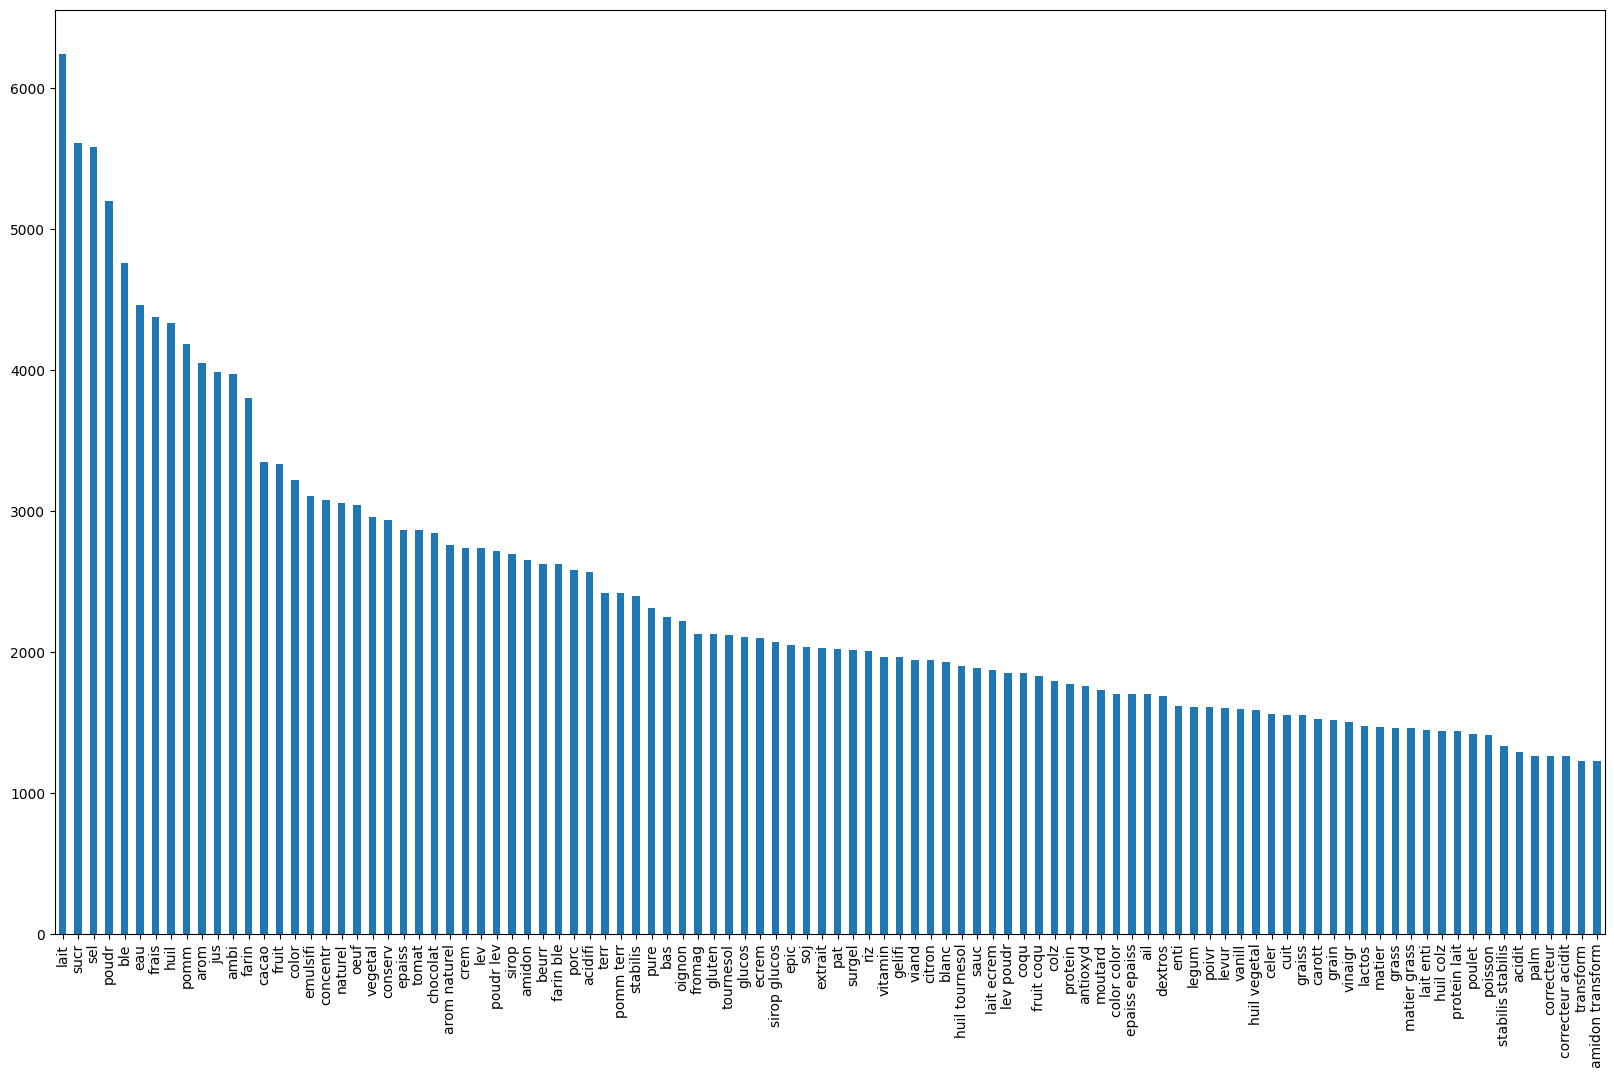

In [170]:
t = df2.sum(axis=0).sort_values(ascending=False)
ax = t[:100].plot( figsize=(20,12),kind = 'bar')

In [171]:
new_df.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Data_Preprocessing\data_clean\clean.csv')

## VI) Conclusion